In [12]:
## load emnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [13]:
#load training samples for letters subset

from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('letters')
print(train_images.shape)
print(train_labels.shape)

(124800, 28, 28)
(124800,)


In [14]:
type(train_images)

numpy.ndarray

In [15]:
# takes array of labels, array of flat or non-flat images, returns subset of images for specified label 
# shows an image from the new array that is returned
def filtered_images(labels_array, images_array, letter):
    if (letter == 'A' or letter =='a'):
        number = 1
    if (letter == 'B' or letter =='b'):
        number = 2
    if (letter == 'C' or letter == 'c'):
        number = 3
    if (letter =='D' or letter == 'd'):
        number = 4
    if (letter == 'E' or letter == 'e'):
        number = 5
    if (letter == 'F' or letter == 'f'):
        number = 6
    if (letter == 'G' or letter == 'g'):
        number = 7
    if (letter == 'H' or letter == 'h'):
        number = 8
    if (letter == 'I' or letter == 'i'):
        number = 9
    if (letter == 'J' or letter == 'j'):
        number = 10
    if (letter == 'K' or letter == 'k'):
        number = 11
    if (letter == 'L' or letter == 'l'):
        number = 12
    if (letter == 'M' or letter == 'm'):
        number = 13
    if (letter == 'N' or letter == 'n'):
        number = 14
    if (letter == 'O' or letter == 'o'):
        number = 15
    if (letter == 'P' or letter == 'p'):
        number = 16
    if (letter == 'Q' or letter == 'q'):
        number = 17
    if (letter == 'R' or letter == 'r'):
        number = 18
    if (letter == 'S' or letter == 's'):
        number = 19
    if (letter == 'T' or letter == 't'):
        number = 20
    if (letter == 'U' or letter == 'u'):
        number = 21
    if (letter == 'V' or letter == 'v'):
        number = 22
    if (letter == 'W' or letter == 'w'):
        number = 23
    if (letter == 'X' or letter == 'x'):
        number = 24
    if (letter == 'Y' or letter == 'y'):
        number = 25
    if (letter == 'Z' or letter == 'z'):
        number = 26
        
    label_filter = np.where(labels_array == number)
    labelled_images = images_array[label_filter] 
    
    return labelled_images

In [5]:
#a_list = filtered_images(train_labels, train_images, 'A')
#train_images = a_list

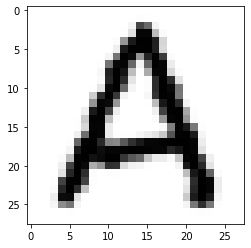

In [6]:
#plt.imshow(a_list[1].reshape((28, 28)), cmap = 'Greys')
#plt.show()

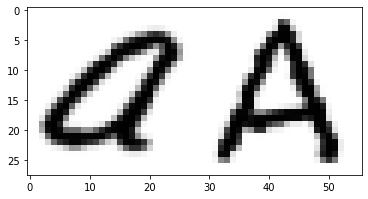

In [7]:
#aa = np.hstack((a_list[0].reshape((28, 28)), a_list[1].reshape((28, 28))))
#plt.imshow(aa, cmap = 'Greys')
#plt.imsave('test2.png', aa, cmap='Greys')

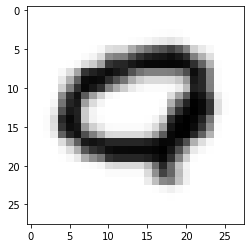

In [48]:
plt.imshow(train_images[8].reshape((28, 28)), cmap = 'binary')
plt.show()

In [9]:
#load testing samples for letters subset
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('letters')
print(test_images.shape)
print(test_labels.shape)

(20800, 28, 28)
(20800,)


In [17]:
def make_word(word, labels_array, images_array):
    
    first_letter = True
    
    for letter in word:
        
        if first_letter:
            letter_set  = filtered_images(labels_array, images_array, str(letter))
            num_letters = letter_set.shape[0]
            this_letter = random.randint(0, num_letters)
            #print(num_letters)
            plt.imshow(letter_set[this_letter].reshape((28, 28)), cmap = 'Greys')
       
            word_array = letter_set[this_letter].reshape((28, 28))
            first_letter = False
            
        else:
            letter_set  = filtered_images(labels_array, images_array, str(letter))
            num_letters = letter_set.shape[0]
            this_letter = random.randint(0, num_letters)
            plt.imshow(letter_set[this_letter].reshape((28, 28)), cmap = 'Greys')
            word_array = np.hstack((word_array, letter_set[this_letter].reshape((28, 28))))

    plt.imshow(word_array, cmap = 'Greys')
    #plt.imsave('test2.png', aa, cmap='Greys')
    

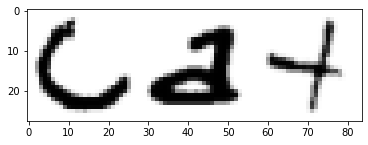

In [18]:
make_word('cat', train_labels, train_images)

In [19]:
string = 'cat'
string[0]

'c'

In [20]:
for l in string:
    print(l)

c
a
t


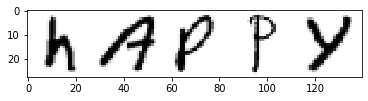

In [21]:
make_word('happy', train_labels, train_images)

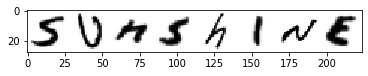

In [22]:
make_word('sunshine', train_labels, train_images)

In [23]:
# import tensorflow and libraries
from __future__ import absolute_import, division, print_function, unicode_literals

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.0.0'

In [65]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import keras

from IPython import display

In [27]:
a_list = filtered_images(train_labels, train_images, 'A')
train_images = a_list

In [28]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [29]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [30]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [31]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model


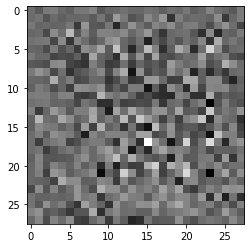

In [32]:
# untrained generator makes a model
# we will use the trained generator to produce test images for each letter

generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [33]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [34]:
# discriminator decides if the image is real or fake
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[1.6496269e-06]], shape=(1, 1), dtype=float32)


In [35]:
# define loss and optimization
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [36]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [37]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [38]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [39]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [40]:
# note that we can vary the number of examples to generate

#define the training loop
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [41]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [42]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as we go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                             epoch + 1,
                             seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

      # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)
    return generator

In [43]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='binary')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()


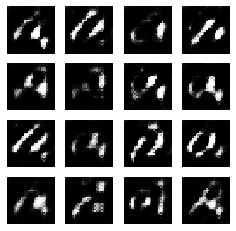

Wall time: 16min 33s


In [44]:
%%time
trained_letter_generator = train(train_dataset, EPOCHS)

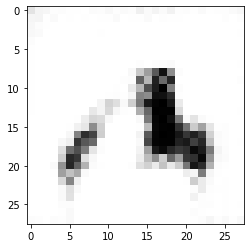

In [50]:
noise = tf.random.normal([1, 100])
generated_image = trained_letter_generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='binary')


In [51]:
plt.imsave('GANtest.png',generated_image[0, :, :, 0] , cmap='binary')

In [58]:
from PIL import Image
my_image = Image.open('GANtest.png')
data = np.array(my_image)

In [59]:
data.shape

(28, 28, 4)

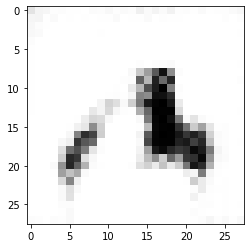

In [60]:
plt.imshow(data)

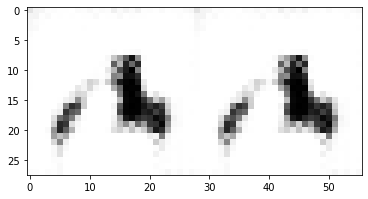

In [61]:
aa = np.hstack((data, data))
plt.imshow(aa)
#plt.imsave('test2.png', aa, cmap='Greys')






In [63]:
trained_letter_generator.save('A_generator.h5')

In [69]:
import tensorflow as tf
my_model = tf.keras.models.load_model('A_generator.h5', compile = False)

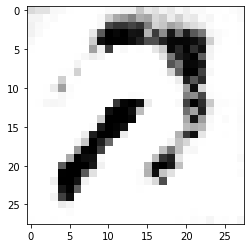

In [70]:
noise = tf.random.normal([1, 100])
generated_image = my_model(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='binary')

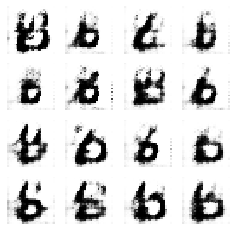

In [73]:
letter_list = ['A', 'B', 'C', 'D', 'E', 
               'F', 'G', 'H', 'I', 'J', 
               'K', 'L', 'M', 'N', 'O', 
               'P', 'Q', 'R', 'S', 'T',
              'U', 'V', 'W', 'X', 'Y', 'Z']

# takes array of labels, array of flat or non-flat images, returns subset of images for specified label 
# shows an image from the new array that is returned
def filtered_images(labels_array, images_array, letter):
    if (letter == 'A' or letter =='a'):
        number = 1
    if (letter == 'B' or letter =='b'):
        number = 2
    if (letter == 'C' or letter == 'c'):
        number = 3
    if (letter =='D' or letter == 'd'):
        number = 4
    if (letter == 'E' or letter == 'e'):
        number = 5
    if (letter == 'F' or letter == 'f'):
        number = 6
    if (letter == 'G' or letter == 'g'):
        number = 7
    if (letter == 'H' or letter == 'h'):
        number = 8
    if (letter == 'I' or letter == 'i'):
        number = 9
    if (letter == 'J' or letter == 'j'):
        number = 10
    if (letter == 'K' or letter == 'k'):
        number = 11
    if (letter == 'L' or letter == 'l'):
        number = 12
    if (letter == 'M' or letter == 'm'):
        number = 13
    if (letter == 'N' or letter == 'n'):
        number = 14
    if (letter == 'O' or letter == 'o'):
        number = 15
    if (letter == 'P' or letter == 'p'):
        number = 16
    if (letter == 'Q' or letter == 'q'):
        number = 17
    if (letter == 'R' or letter == 'r'):
        number = 18
    if (letter == 'S' or letter == 's'):
        number = 19
    if (letter == 'T' or letter == 't'):
        number = 20
    if (letter == 'U' or letter == 'u'):
        number = 21
    if (letter == 'V' or letter == 'v'):
        number = 22
    if (letter == 'W' or letter == 'w'):
        number = 23
    if (letter == 'X' or letter == 'x'):
        number = 24
    if (letter == 'Y' or letter == 'y'):
        number = 25
    if (letter == 'Z' or letter == 'z'):
        number = 26
        
    label_filter = np.where(labels_array == number)
    labelled_images = images_array[label_filter] 
    
    return labelled_images



#### code to generate a trained GAN model for a single letter
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('letters')

my_letter = 'B'

a_list = filtered_images(train_labels, train_images, my_letter)
train_images = a_list

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

# untrained generator makes a model
# we will use the trained generator to produce test images for each letter

generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

# discriminator decides if the image is real or fake
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
#print (decision)

# define loss and optimization
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# note that we can vary the number of examples to generate

#define the training loop
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        # Produce images for the GIF as we go
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                             epoch + 1,
                             seed)

        # Save the model every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

      # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)
    return generator

def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='binary')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

#%%time
trained_letter_generator = train(train_dataset, EPOCHS)

model_name = my_letter + '_generator.h5'

trained_letter_generator.save(model_name)

In [74]:
my_model = tf.keras.models.load_model('B_generator.h5', compile = False)

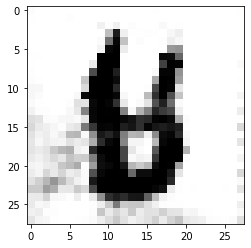

In [75]:
noise = tf.random.normal([1, 100])
generated_image = my_model(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='binary')

In [77]:
def train_letter_model(my_letter):
    # takes array of labels, array of flat or non-flat images, returns subset of images for specified label 
# shows an image from the new array that is returned
    def filtered_images(labels_array, images_array, letter):
        if (letter == 'A' or letter =='a'):
            number = 1
        if (letter == 'B' or letter =='b'):
            number = 2
        if (letter == 'C' or letter == 'c'):
            number = 3
        if (letter =='D' or letter == 'd'):
            number = 4
        if (letter == 'E' or letter == 'e'):
            number = 5
        if (letter == 'F' or letter == 'f'):
            number = 6
        if (letter == 'G' or letter == 'g'):
            number = 7
        if (letter == 'H' or letter == 'h'):
            number = 8
        if (letter == 'I' or letter == 'i'):
            number = 9
        if (letter == 'J' or letter == 'j'):
            number = 10
        if (letter == 'K' or letter == 'k'):
            number = 11
        if (letter == 'L' or letter == 'l'):
            number = 12
        if (letter == 'M' or letter == 'm'):
            number = 13
        if (letter == 'N' or letter == 'n'):
            number = 14
        if (letter == 'O' or letter == 'o'):
            number = 15
        if (letter == 'P' or letter == 'p'):
            number = 16
        if (letter == 'Q' or letter == 'q'):
            number = 17
        if (letter == 'R' or letter == 'r'):
            number = 18
        if (letter == 'S' or letter == 's'):
            number = 19
        if (letter == 'T' or letter == 't'):
            number = 20
        if (letter == 'U' or letter == 'u'):
            number = 21
        if (letter == 'V' or letter == 'v'):
            number = 22
        if (letter == 'W' or letter == 'w'):
            number = 23
        if (letter == 'X' or letter == 'x'):
            number = 24
        if (letter == 'Y' or letter == 'y'):
            number = 25
        if (letter == 'Z' or letter == 'z'):
            number = 26
        
        label_filter = np.where(labels_array == number)
        labelled_images = images_array[label_filter] 
    
        return labelled_images


#### code to generate a trained GAN model for a single letter
#from emnist import extract_training_samples
    train_images, train_labels = extract_training_samples('letters')

    a_list = filtered_images(train_labels, train_images, my_letter)
    train_images = a_list

    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
    train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

    BUFFER_SIZE = 60000
    BATCH_SIZE = 256

    # Batch and shuffle the data
    train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

    def make_generator_model():
        model = tf.keras.Sequential()
        model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Reshape((7, 7, 256)))
        assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

        model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
        assert model.output_shape == (None, 7, 7, 128)
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
        assert model.output_shape == (None, 14, 14, 64)
        model.add(layers.BatchNormalization())
        model.add(layers.LeakyReLU())

        model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
        assert model.output_shape == (None, 28, 28, 1)

        return model

# untrained generator makes a model
# we will use the trained generator to produce test images for each letter

    generator = make_generator_model()

    noise = tf.random.normal([1, 100])
    generated_image = generator(noise, training=False)

    plt.imshow(generated_image[0, :, :, 0], cmap='gray')

    def make_discriminator_model():
        model = tf.keras.Sequential()
        model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
        model.add(layers.LeakyReLU())
        model.add(layers.Dropout(0.3))

        model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
        model.add(layers.LeakyReLU())
        model.add(layers.Dropout(0.3))

        model.add(layers.Flatten())
        model.add(layers.Dense(1))

        return model

# discriminator decides if the image is real or fake
    discriminator = make_discriminator_model()
    decision = discriminator(generated_image)
#print (decision)

# define loss and optimization
# This method returns a helper function to compute cross entropy loss
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    def discriminator_loss(real_output, fake_output):
        real_loss = cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        total_loss = real_loss + fake_loss
        return total_loss

    def generator_loss(fake_output):
        return cross_entropy(tf.ones_like(fake_output), fake_output)

    generator_optimizer = tf.keras.optimizers.Adam(1e-4)
    discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

    checkpoint_dir = './training_checkpoints'
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
    checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# note that we can vary the number of examples to generate

#define the training loop
    EPOCHS = 50
    noise_dim = 100
    num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
    seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
    @tf.function
    def train_step(images):
        noise = tf.random.normal([BATCH_SIZE, noise_dim])

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            generated_images = generator(noise, training=True)

            real_output = discriminator(images, training=True)
            fake_output = discriminator(generated_images, training=True)

            gen_loss = generator_loss(fake_output)
            disc_loss = discriminator_loss(real_output, fake_output)

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    def train(dataset, epochs):
        for epoch in range(epochs):
            start = time.time()

            for image_batch in dataset:
                train_step(image_batch)

        # Produce images for the GIF as we go
            display.clear_output(wait=True)
            generate_and_save_images(generator,
                             epoch + 1,
                             seed)

        # Save the model every 15 epochs
            if (epoch + 1) % 15 == 0:
                checkpoint.save(file_prefix = checkpoint_prefix)

            print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

      # Generate after the final epoch
        display.clear_output(wait=True)
        generate_and_save_images(generator,
                           epochs,
                           seed)
        return generator

    def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
        predictions = model(test_input, training=False)

        fig = plt.figure(figsize=(4,4))

        for i in range(predictions.shape[0]):
            plt.subplot(4, 4, i+1)
            plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='binary')
            plt.axis('off')

        plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
        plt.show()

#%%time
    trained_letter_generator = train(train_dataset, EPOCHS)

    model_name = 'Epochs_50/' + my_letter + '_generator.h5'

    trained_letter_generator.save(model_name)

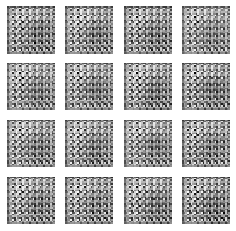

Time for epoch 4 is 19.756186723709106 sec


In [ ]:
from emnist import extract_training_samples
letter_list = ['A', 'B', 'C', 'D', 'E', 
               'F', 'G', 'H', 'I', 'J', 
               'K', 'L', 'M', 'N', 'O', 
               'P', 'Q', 'R', 'S', 'T',
              'U', 'V', 'W', 'X', 'Y', 'Z']

for letter in letter_list:
    train_letter_model(letter)